In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd
import matplotlib.patches as mpatches
%matplotlib inline

plt.rcParams['figure.figsize'] = (10,6)

In [31]:
X = np.arange(0.0,5.1,0.1)
X

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. ])

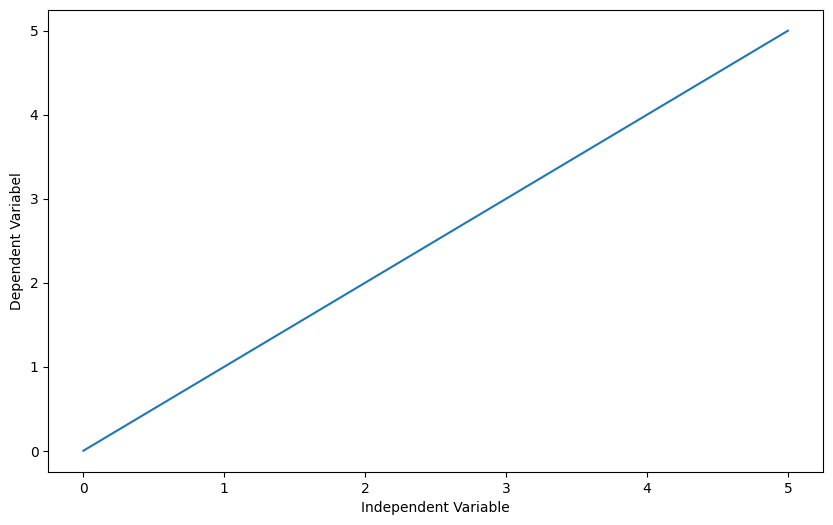

In [32]:
a=1
b=0
Y = a*X + b

plt.plot(X,Y)
plt.xlabel('Independent Variable')
plt.ylabel('Dependent Variabel')
plt.show()

In [33]:
df = pd.read_csv("https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [34]:
train_x = np.asanyarray(df[['ENGINESIZE']])
train_y = np.asanyarray(df[['CO2EMISSIONS']])

In [35]:
train_x,train_y

(array([[2. ],
        [2.4],
        [1.5],
        ...,
        [3. ],
        [3.2],
        [3.2]]),
 array([[196],
        [221],
        [136],
        ...,
        [271],
        [260],
        [294]], dtype=int64))

In [36]:
a = tf.Variable(20.0)
b = tf.Variable(30.2)

In [37]:
def h(x):
    y = a*x +b
    return y

In [38]:
def loss_reducer(y,train_y):
    return tf.reduce_mean(tf.square(y-train_y))


In [39]:
learning_rate =0.01
train_data=[]
loss_values=[]
a_values=[]
b_values=[]

training_epochs = 200

for epochs  in range(training_epochs):
    with tf.GradientTape() as tape:
        y_predicted = h(train_x)
        loss_value = loss_reducer(train_y,y_predicted)
        loss_values.append(loss_value)

        gradiante = tape.gradient(loss_values,[b,a])

        a_values.append(a.numpy())
        b_values.append(b.numpy())

        b.assign_sub(gradiante[0]*learning_rate)
        a.assign_sub(gradiante[1]*learning_rate)

        if epochs % 5 == 0:
            train_data.append([a.numpy(), b.numpy()])

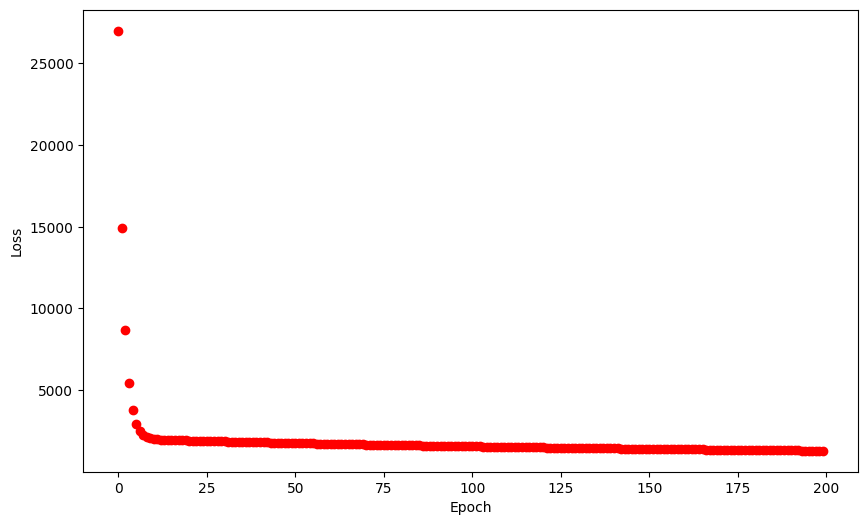

In [40]:
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(loss_values, 'ro')
plt.show()

In [43]:
print(train_data,loss_values)

[[31.414211, 33.382053], [54.816692, 40.65341], [59.065193, 42.998283], [59.64082, 44.38414], [59.51489, 45.572674], [59.257656, 46.710266], [58.978527, 47.825195], [58.698444, 48.92307], [58.42139, 50.005154], [58.148083, 51.07186], [57.87861, 52.12345], [57.612946, 53.16014], [57.351044, 54.182144], [57.092854, 55.189667], [56.838318, 56.18292], [56.587395, 57.162106], [56.340023, 58.127415], [56.096153, 59.079052], [55.85574, 60.01721], [55.618736, 60.942074], [55.385086, 61.853836], [55.154743, 62.752686], [54.927666, 63.638794], [54.703804, 64.51235], [54.483116, 65.37354], [54.265553, 66.222534], [54.05107, 67.059494], [53.83963, 67.88459], [53.631184, 68.698006], [53.42569, 69.49989], [53.223106, 70.29042], [53.02339, 71.069756], [52.826508, 71.83805], [52.632416, 72.59547], [52.441067, 73.34215], [52.252434, 74.07825], [52.06647, 74.803925], [51.88314, 75.51932], [51.702408, 76.22459], [51.524235, 76.91985]] [<tf.Tensor: shape=(), dtype=float32, numpy=26992.586>, <tf.Tensor: sh

In [42]:
print(a_values,b_values)

[20.0, 31.414211, 39.601974, 45.470493, 49.6719, 52.674976, 54.816692, 56.339283, 57.416866, 58.174614, 58.702496, 59.065193, 59.309196, 59.467922, 59.5654, 59.618893, 59.64082, 59.6401, 59.623146, 59.594574, 59.557693, 59.51489, 59.467873, 59.417873, 59.365776, 59.312218, 59.257656, 59.20242, 59.14674, 59.09079, 59.03469, 58.978527, 58.922363, 58.866245, 58.810207, 58.75427, 58.698444, 58.64275, 58.587193, 58.531776, 58.47651, 58.42139, 58.36642, 58.311607, 58.256947, 58.20244, 58.148083, 58.09388, 58.039833, 57.98594, 57.932198, 57.87861, 57.825172, 57.77189, 57.718758, 57.665775, 57.612946, 57.560265, 57.507736, 57.455357, 57.403126, 57.351044, 57.29911, 57.247326, 57.19569, 57.1442, 57.092854, 57.041656, 56.990604, 56.939697, 56.888935, 56.838318, 56.787846, 56.73752, 56.687336, 56.637295, 56.587395, 56.537636, 56.48802, 56.43855, 56.389214, 56.340023, 56.29097, 56.242058, 56.193283, 56.14465, 56.096153, 56.0478, 55.999577, 55.951492, 55.90355, 55.85574, 55.808067, 55.760532, 55.71

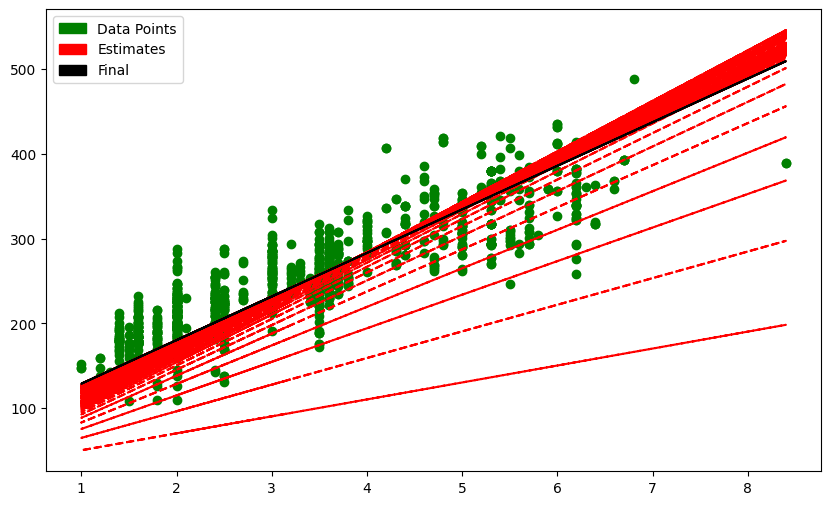

In [46]:
plt.scatter(train_x,train_y,color='green')
for a,b in zip(a_values[0:len(a_values)],b_values[0:len(b_values)]):
    plt.plot(train_x,a*train_x+b,color='red',linestyle='dashed')
plt.plot(train_x,a_values[-1]*train_x+b_values[-1], color='black')
final = mpatches.Patch(color='Black', label='Final')
estimates = mpatches.Patch(color='Red', label='Estimates')
data = mpatches.Patch(color='Green', label='Data Points')

plt.legend(handles=[data, estimates, final])

plt.show()